## **Name: Kagabo Faustin**

### **Assignment 1 MAP6014 report**

*link for the code : https://github.com/kagabof/regression/blob/main/Travail-1-MAP6014.ipynb*

## **Question 1:**

## **a.**

by using the Poisson low:

F(X = x) = (e^(-λ) * λ^x) / x!

In [ ]:
import math
def poison_low(λ, x):
  return ((math.e**(-λ)) * (λ**(x))) / math.factorial(x)

round(poison_low(6, 4), 2)

The probability that they will receive exactly 4 patients at the emergency department
during the next hour is approximately 0.13 which is **13%**

## **b.**
the probability that they will receive at least 8 patients at the emergency department
during the next hour is:
1 - f(x) where is all patients less than 8

In [110]:
prob_sum = 0
for patient_num in range(1, 8):
  prob_sum = prob_sum + poison_low(6, patient_num)

round(1 - prob_sum, 2)

0.26

The probability that they will receive at least 8 patients at the emergency department
during the next hour is **0.26**

## **c.**
On average, **6** patients should be expected to be received at the emergency department in
one hour.

## **Question 2:**

In this question I am using a Car sales data set from [kaggle](https://www.kaggle.com/datasets/gagandeep16/car-sales)

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [112]:
# read the file
df = pd.read_csv('./Car_sales 2.csv')
# View of the first 5 rows
df.head(5)

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


In [113]:
# View of the last 5 rows of the dataset
df.tail(5)

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
152,Volvo,V40,3.545,NaN,Passenger,24.4,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,9/21/2011,66.498812
153,Volvo,S70,15.245,NaN,Passenger,27.5,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,11/24/2012,70.654495
154,Volvo,V70,17.531,NaN,Passenger,28.8,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,6/25/2011,71.155978
155,Volvo,C70,3.493,NaN,Passenger,45.5,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,4/26/2011,101.623357
156,Volvo,S80,18.969,NaN,Passenger,36.0,2.9,201.0,109.9,72.1,189.8,3.600,21.1,24.0,11/14/2011,85.735655


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   Sales_in_thousands   157 non-null    float64
 3   __year_resale_value  121 non-null    float64
 4   Vehicle_type         157 non-null    object 
 5   Price_in_thousands   155 non-null    float64
 6   Engine_size          156 non-null    float64
 7   Horsepower           156 non-null    float64
 8   Wheelbase            156 non-null    float64
 9   Width                156 non-null    float64
 10  Length               156 non-null    float64
 11  Curb_weight          155 non-null    float64
 12  Fuel_capacity        156 non-null    float64
 13  Fuel_efficiency      154 non-null    float64
 14  Latest_Launch        157 non-null    object 
 15  Power_perf_factor    155 non-null    flo

**Observations:**

- The dataset has **157 observations (row) and 16 columns**.

- One column **label** have data type object which mean it is not numeric in our case it is string and categoric value.

- Except **label** column other are numeric value, they have int64 of float64 as a data type.

In [115]:
df.describe(include=["object"]).T

,count,unique,top,freq
Manufacturer,157,30,Dodge,11
Model,157,156,Neon,2
Vehicle_type,157,2,Passenger,116
Latest_Launch,157,130,10/5/2012,2


In [116]:
df.describe(include=['float64', 'int64']).T

,count,mean,std,min,25%,50%,75%,max
Sales_in_thousands,157.0,52.998076,68.029422,0.110000,14.114000,29.450000,67.956000,540.561000
__year_resale_value,121.0,18.072975,11.453384,5.160000,11.260000,14.180000,19.875000,67.550000
Price_in_thousands,155.0,27.390755,14.351653,9.235000,18.017500,22.799000,31.947500,85.500000
Engine_size,156.0,3.060897,1.044653,1.000000,2.300000,3.000000,3.575000,8.000000
Horsepower,156.0,185.948718,56.700321,55.000000,149.500000,177.500000,215.000000,450.000000
Wheelbase,156.0,107.487179,7.641303,92.600000,103.000000,107.000000,112.200000,138.700000
Width,156.0,71.150000,3.451872,62.600000,68.400000,70.550000,73.425000,79.900000
Length,156.0,187.343590,13.431754,149.400000,177.575000,187.900000,196.125000,224.500000
Curb_weight,155.0,3.378026,0.630502,1.895000,2.971000,3.342000,3.799500,5.572000
Fuel_capacity,156.0,17.951923,3.887921,10.300000,15.800000,17.200000,19.575000,32.000000


In [117]:
# Check for null values
df.isna().sum()

Manufacturer            0
Model                   0
Sales_in_thousands      0
__year_resale_value    36
Vehicle_type            0
Price_in_thousands      2
Engine_size             1
Horsepower              1
Wheelbase               1
Width                   1
Length                  1
Curb_weight             2
Fuel_capacity           1
Fuel_efficiency         3
Latest_Launch           0
Power_perf_factor       2
dtype: int64

**Observation:**

- As it is observed above we have null values and we have to on most is 36 which is from column but **__year_resale_value**

In [118]:
# selecting numerical columns / quantitative values
numeric_df = df.select_dtypes(include=['float64', 'int64'])
numeric_df

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
0,16.919,16.360,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,58.280150
1,39.384,19.875,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,91.370778
2,14.114,18.225,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,NaN
3,8.588,29.725,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,91.389779
4,20.397,22.255,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,62.777639
...,...,...,...,...,...,...,...,...,...,...,...,...
152,3.545,NaN,24.40,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,66.498812
153,15.245,NaN,27.50,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,70.654495
154,17.531,NaN,28.80,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,71.155978
155,3.493,NaN,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,101.623357


**Observation:**

  -  We have 12 numerical values colum

In [119]:
# separate numerical and none numerical columns
numeric_columns = numeric_df.columns.to_list()
none_numeric_columns = df.select_dtypes(exclude=['float64', 'int64']).columns.to_list()

print('Numerical columns:', numeric_columns)
print('None numerical columns:', none_numeric_columns)

Numerical columns: ['Sales_in_thousands', '__year_resale_value', 'Price_in_thousands', 'Engine_size', 'Horsepower', 'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity', 'Fuel_efficiency', 'Power_perf_factor']
None numerical columns: ['Manufacturer', 'Model', 'Vehicle_type', 'Latest_Launch']


In [120]:
# replace null values with the mean value
for index, el in enumerate(numeric_df.isna().sum()):
  if el > 0:
    numeric_df[numeric_columns[index]].fillna(value=numeric_df[numeric_columns[index]].mean(), inplace=True)

<Axes: >

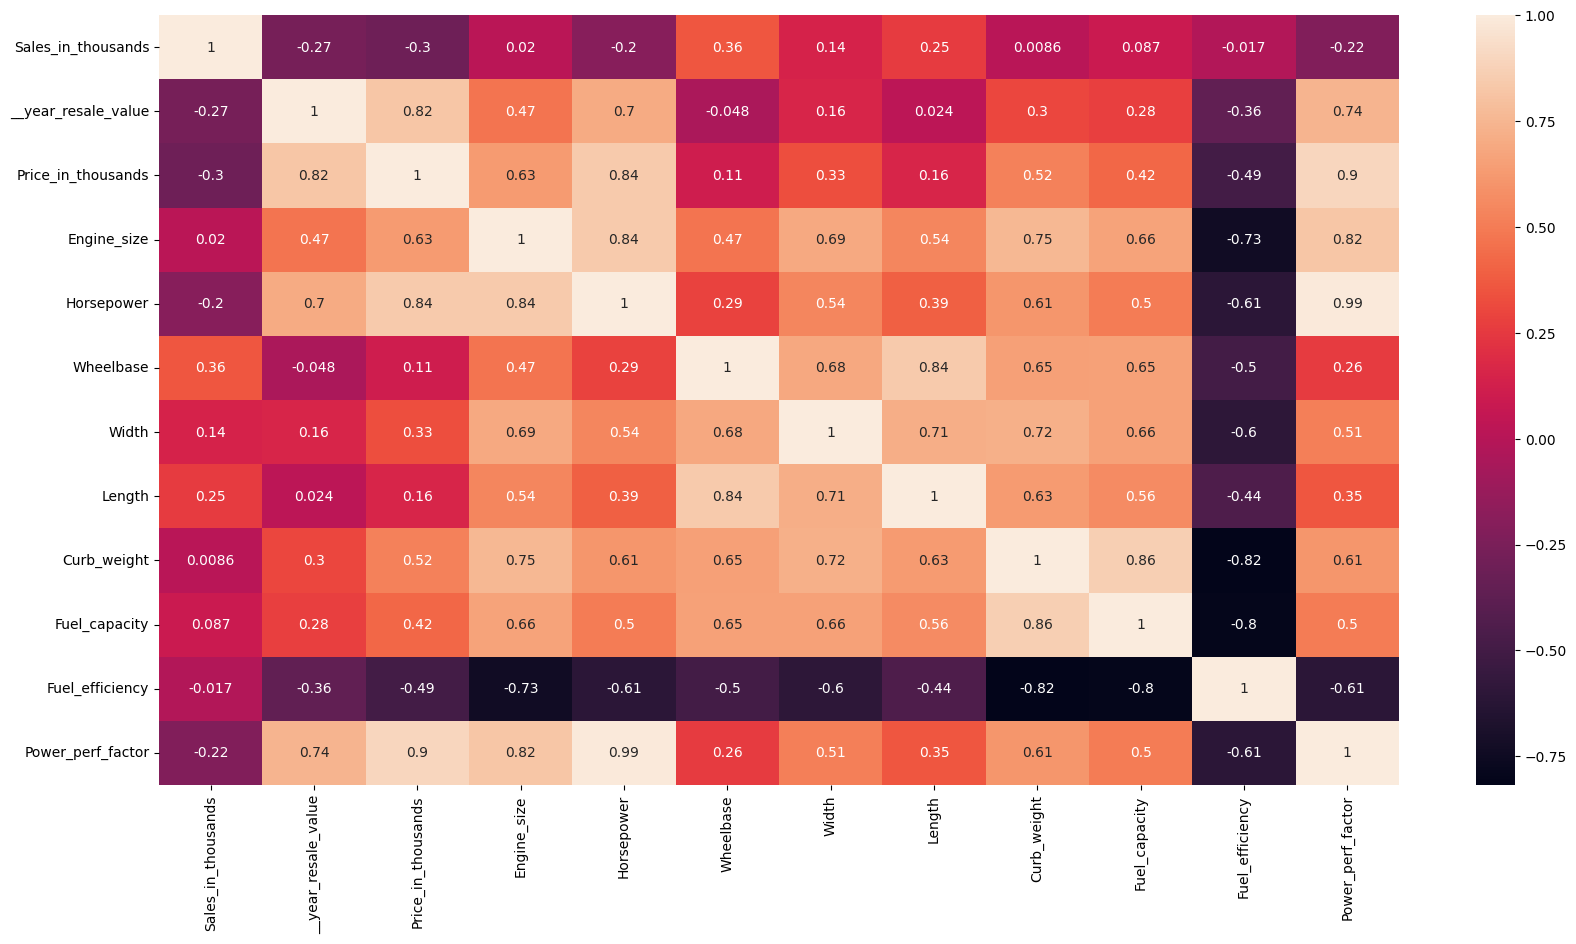

In [121]:
fig = plt.figure(figsize = (20, 10))
sns.heatmap(numeric_df.corr(), annot = True)

**Observation**

- We have highly some field which have he higher positive correlation and some which highly negatively correlated.

- This means that some values mean almost the some thing and we can reduce the dimension by doing principle component analysis.

## **PCA Analysis**

In [122]:
sc = StandardScaler()
X_scaler = sc.fit_transform(numeric_df)

In [123]:
pca = PCA()

pca.fit(X_scaler)

# Principal components
components = pca.components_

# this shows how much the principle component contribute to the overall variance of dataset
explained_variance = pca.explained_variance_ratio_
explained_variance

array([5.57600319e-01, 2.14266064e-01, 6.51189120e-02, 5.36892512e-02,
       3.40488538e-02, 2.15961642e-02, 1.58787869e-02, 1.26770777e-02,
       1.09771464e-02, 8.72752463e-03, 5.32450847e-03, 9.53920315e-05])

In [124]:
explained_variance_cumulative = []
for index, el in enumerate(explained_variance):
  if index == 0:
    explained_variance_cumulative.append(el)
  else:
    explained_variance_cumulative.append(explained_variance_cumulative[-1] + el)
explained_variance_cumulative

explained_variance_cumulative_df = pd.concat(
  [
    pd.DataFrame(explained_variance, columns=["explained_variance"]),
    pd.DataFrame(explained_variance_cumulative, columns=["explained_variance_cumulative"])
  ], axis=1)

explained_variance_cumulative_df

,explained_variance,explained_variance_cumulative
0,0.557600,0.557600
1,0.214266,0.771866
2,0.065119,0.836985
3,0.053689,0.890675
4,0.034049,0.924723
5,0.021596,0.946320
6,0.015879,0.962198
7,0.012677,0.974875
8,0.010977,0.985853
9,0.008728,0.994580


**Observations**

- This means that the first principle component is representing 55% of the dataset

- And the first and second principle component represent the dataset by 77% of it. This also means that 23% of the dataset is not presented.

In [125]:
eigenvalues = pca.explained_variance_
eigenvalues_vector = pca.components_
loadings = eigenvalues_vector * np.sqrt(eigenvalues.reshape(-1, 1))
print('Proper values: \n\n', eigenvalues)

Proper values: 

 [6.73409616e+00 2.58767477e+00 7.86436091e-01 6.48400957e-01
 4.11205388e-01 2.60815214e-01 1.91766887e-01 1.53100092e-01
 1.32570153e-01 1.05401644e-01 6.43036793e-02 1.15204223e-03]


In [126]:
pc_column_names = []
for el in range(1, len(numeric_df.columns) + 1):
  pc_column_names.append(f'PC{el}')

In [127]:
pc_df = pd.DataFrame(data=pc_column_names, columns=['PC'])

In [128]:
df_scores = pd.DataFrame(data=components, columns=pc_column_names)
df_scores.head(5)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
0,0.008595,-0.215153,-0.283192,-0.349360,-0.333971,-0.240297,-0.299528,-0.251819,-0.341328,-0.314664,0.319922,-0.333330
1,0.394305,-0.417250,-0.366798,-0.023873,-0.242407,0.415680,0.230333,0.350342,0.134864,0.175317,-0.061008,-0.274455
2,0.744967,0.256404,0.121182,0.104838,0.192115,0.059566,-0.007239,0.128238,-0.292777,-0.310570,0.285302,0.181883
3,0.496593,0.127253,0.018060,0.014358,-0.155183,-0.201896,-0.272189,-0.480954,0.154519,0.350377,-0.454290,-0.115766
4,0.057911,-0.482802,-0.249027,0.476604,0.221001,-0.398969,0.323146,-0.232876,-0.065728,-0.249100,-0.158844,0.126916


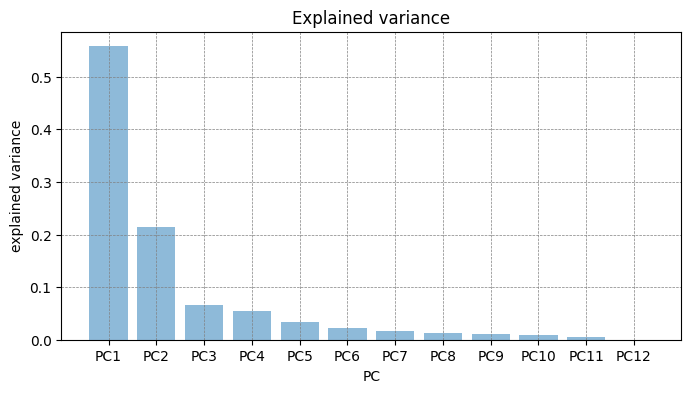

In [129]:
plt.figure(figsize=(8, 4))
plt.bar(pc_column_names, explained_variance, alpha=0.5, align='center')
plt.xlabel('PC')
plt.ylabel('explained variance')
plt.title('Explained variance')
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.show()

The above graph shows represent how much variance a principle component contain of the all data set.

In our case the first contain 55.7% of the dataset

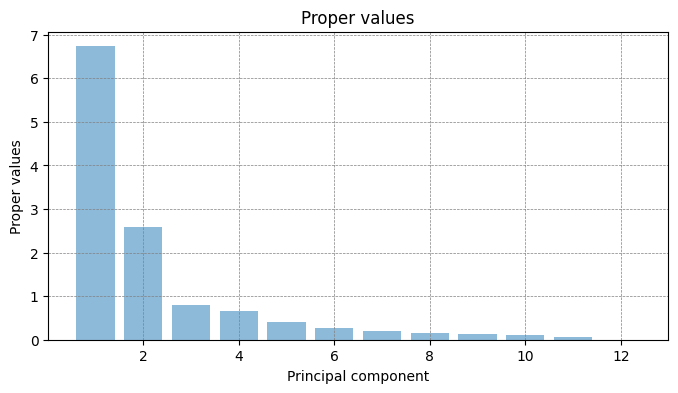

In [130]:
plt.figure(figsize=(8, 4))
plt.bar(range(1, len(eigenvalues) + 1), eigenvalues, alpha=0.5, align='center')
plt.xlabel('Principal component')
plt.ylabel('Proper values')
plt.title('Proper values')
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.show()

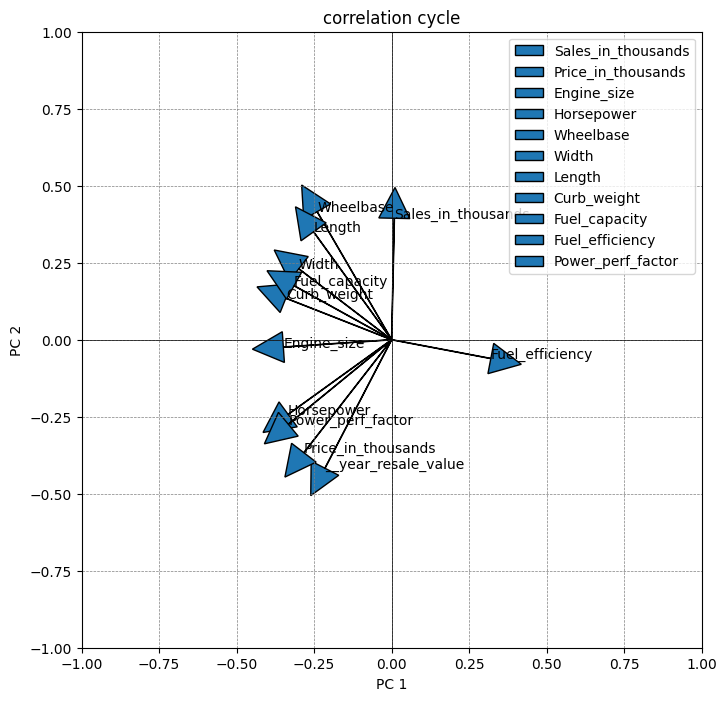

In [131]:
plt.figure(figsize=(8, 8))
plt.title("correlation cycle")

for i, var in enumerate(numeric_columns):
    x = components[0, i]
    y = components[1, i]
    plt.arrow(0, 0, x, y, head_width=0.1, head_length=0.1, label=var)

for i, var in enumerate(numeric_columns):
    plt.annotate(var, (components[0, i], components[1, i]), )

plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.legend(loc='upper right')
plt.show()

Observation:

- Engine_size and Fuel_efficiency attribute is highly correlation with the principle component one (PC1)

- Sales_in_thousands attribute is highly correlation with principle component two (PC2) 

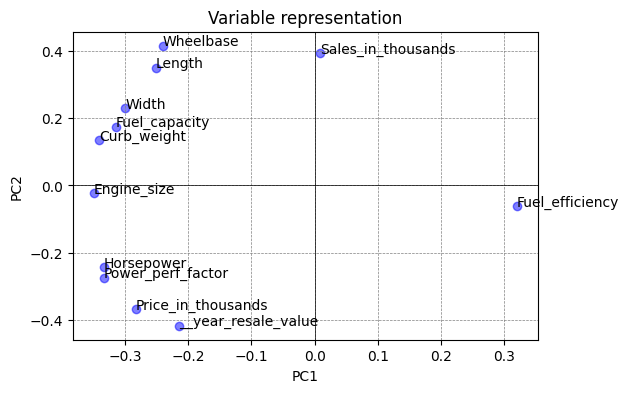

In [132]:

plt.figure(figsize=(6, 4))
plt.title("Variable representation")
plt.scatter(components[0, :], components[1, :], marker='o', c='blue', alpha=0.5)
for i, var in enumerate(numeric_columns):
    plt.annotate(var, (components[0, i], components[1, i]))

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.show()

**Observation:**

- By the first and the second principal component we are representing 77.18% of the variance in of our attributes.

- Engine_size and Fuel_efficiency attribute is highly associate with the principle component one (PC1)
- Sales_in_thousands attribute is highly associated with principle component two (PC2)
- The most independent variables are Fuel_efficiency and sales_in_thousands because the correlation between them and other variables is weak.


**By concluding:**

- the main variables to evaluate more should be Fuel_efficiency, Engine_size and Sales_in_thousands


Based on the graph above:

- the first attribute to retaining is Fuel_efficiency since it positively correlated with the PC1 which contain 55% of all variables in the dataset.

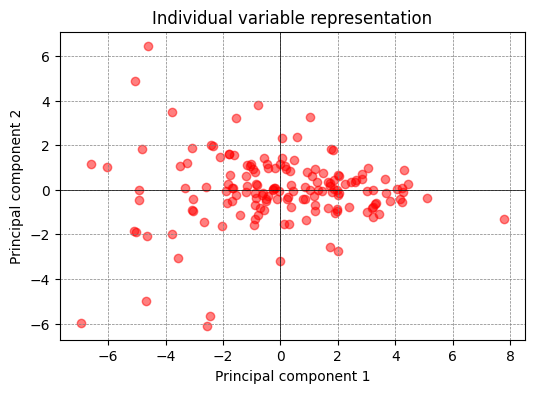

In [133]:
individuals = pca.transform(X_scaler)

plt.figure(figsize=(6, 4))
plt.title("Individual variable representation")
plt.scatter(individuals[:, 0], individuals[:, 1], marker='o', c='red', alpha=0.5)

plt.xlabel("Principal component 1")
plt.ylabel("Principal component 2")
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.show()

**Observation:**

- With the individual variable representation table demonstrate that most of the variable are condensed on the principal component one.

## **Question 3:**

In [134]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import seaborn as sns

## **Import the dataset**

In [135]:
df = pd.read_csv("./StudentsPerformance.csv")
# Show 10 first rows
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


**Observations:**
 
 - There are 1000 observations and 8 columns in the data.
 - All columns have 1000 non-null values i.e. there are no missing values (non-null).

In [137]:
numeric_columns =  df.select_dtypes(exclude=['object']).columns.to_list()
none_numeric_columns = df.select_dtypes(exclude=['float64', 'int64']).columns.to_list()
print('numeric value: ', numeric_columns)
print('non numeric value: ', none_numeric_columns)

numeric value:  ['math score', 'reading score', 'writing score']
non numeric value:  ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [138]:
# select not categorical values
numeric_df = df.select_dtypes(include=['float64', 'int64'])
none_numeric_df = df.select_dtypes(exclude=['float64', 'int64'])

## Exploratory Data Analysis

In [139]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


**Observation:**

- Students succeed more in **reading** with 69.1% score than in other in **writing** and  **math** which is also the minimum with 66%.

- The maximum score in class in all courses is 100.

math score
Skew : -0.28


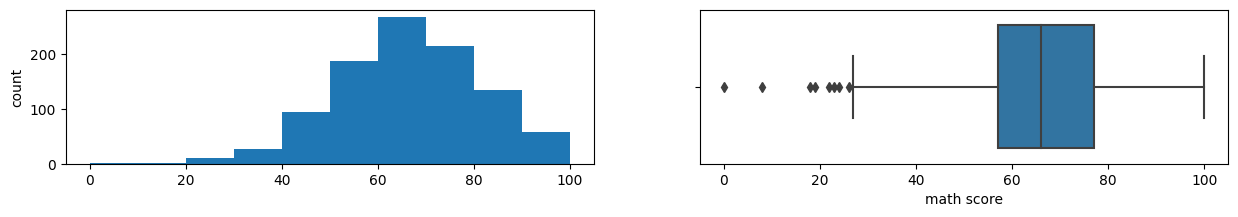

reading score
Skew : -0.26


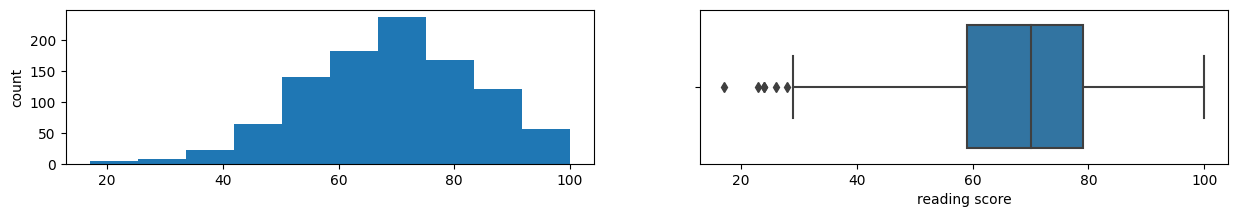

writing score
Skew : -0.29


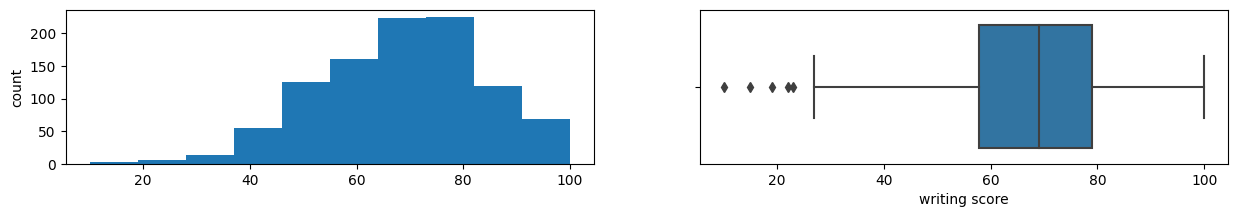

In [140]:
for col in numeric_columns:
    print(col)
    print('Skew :',round(numeric_df[col].skew(),2))
    plt.figure(figsize=(15,2))
    plt.subplot(1,2,1)
    df[col].hist(bins=10, grid=False)
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=numeric_df[col])
    plt.show()

**Observations:**

- The distribution of the scores on all courses is left Skew which means that all more students scores are above the median.

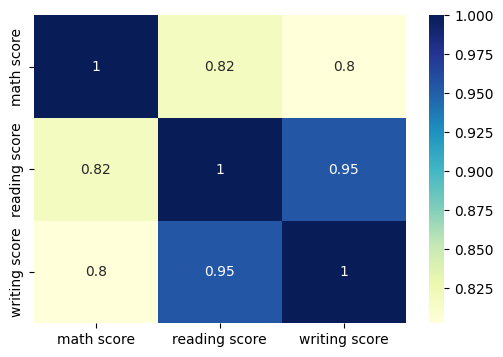

In [141]:
plt.figure(figsize  = (6,4))
sns.heatmap(numeric_df.corr(), annot = True, cmap="YlGnBu")
plt.show()

**Observations:**

- All course scores are highly correlated but reading and writing correlation is the highest with 0.95.
- This means that the scores of individual course represent the some thing.

**Actions:**

- We can make a mean that represent all scales and drop the individual courses.

In [142]:
df['mean score'] = df[numeric_columns].mean(axis=1).round()
df = df.drop(numeric_columns, axis=1)
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,mean score
0,female,group B,bachelor's degree,standard,none,73.0
1,female,group C,some college,standard,completed,82.0
2,female,group B,master's degree,standard,none,93.0
3,male,group A,associate's degree,free/reduced,none,49.0
4,male,group C,some college,standard,none,76.0


<Axes: xlabel='mean score', ylabel='Density'>

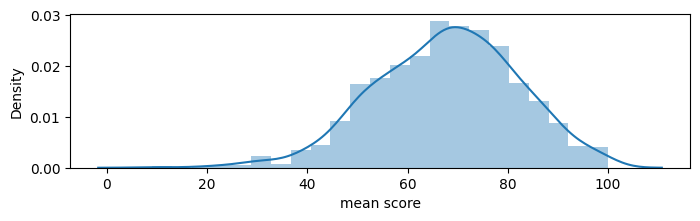

In [143]:
plt.figure(figsize=(8, 2))
sns.distplot(df["mean score"], axlabel = "mean score")

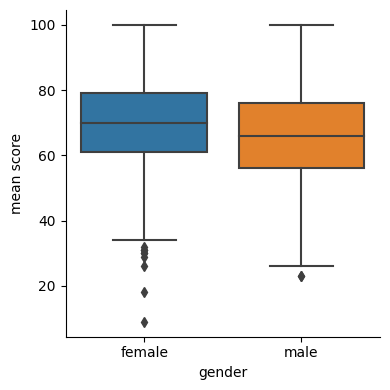

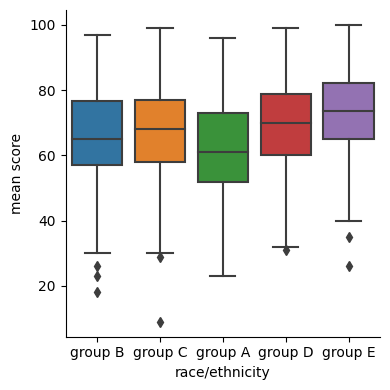

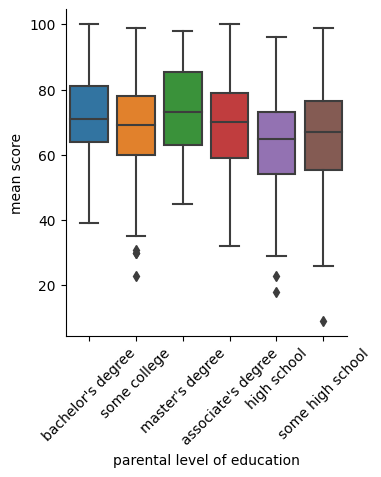

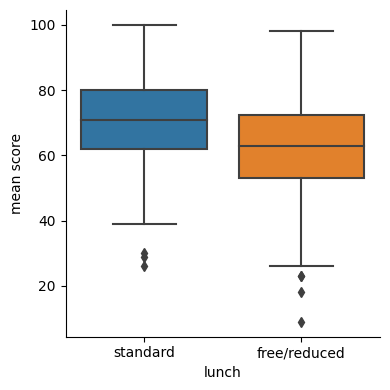

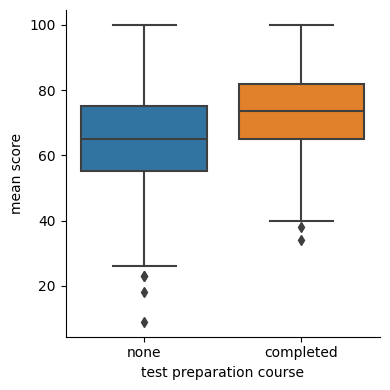

In [144]:
for el in none_numeric_columns:
  sns.catplot(data=df, x=el, y="mean score", kind="box", height=4)
  if el == 'parental level of education':
    plt.xticks(rotation=45)
    plt.show()

In [145]:

# Check all categories in none numeric values or categorical values
for el in none_numeric_columns:
  print(f'{el}: ', df[el].unique())

gender:  ['female' 'male']
race/ethnicity:  ['group B' 'group C' 'group A' 'group D' 'group E']
parental level of education:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
lunch:  ['standard' 'free/reduced']
test preparation course:  ['none' 'completed']


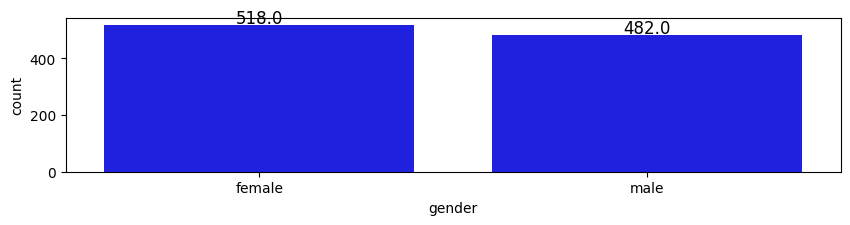

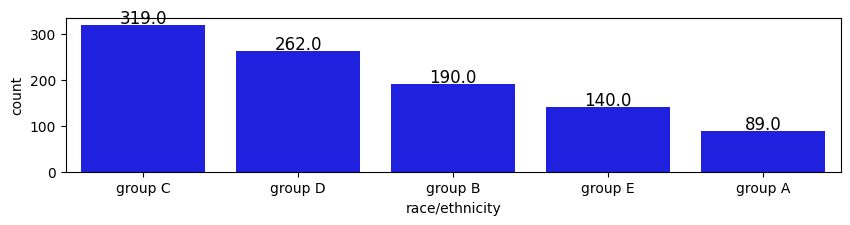

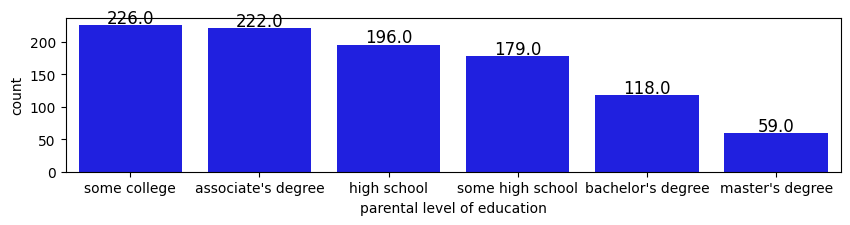

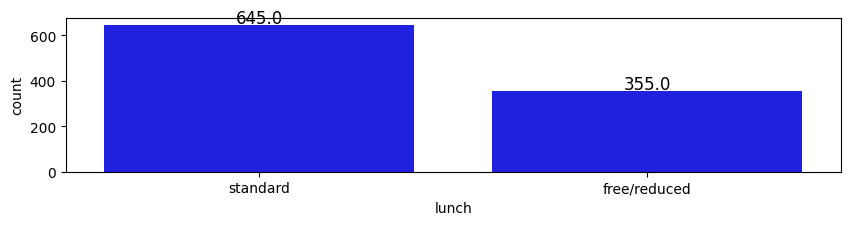

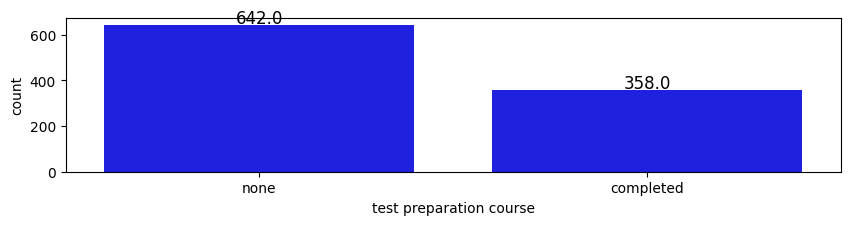

In [146]:

for el in none_numeric_columns:
  plt.subplots(figsize = (10, 2))
  ax = sns.countplot(x = el, data = df, color = 'blue', order = df[el].value_counts().index)
  for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

  plt.show()

### **Find the percentage of outliers**

In [147]:
Q1 = df.select_dtypes(exclude=['object']).quantile(0.25)
Q3 = df.select_dtypes(exclude=['object']).quantile(0.75)

IQR = Q3 - Q1
lower = (Q1 - 1.5 * IQR)
upper = Q3 + 1.5 * IQR

In [148]:
(
    (df.select_dtypes(include=["float64", "int64"]) < lower)
    | (df.select_dtypes(include=["float64", "int64"]) > upper)
).sum() / len(df) * 100

mean score    0.6
dtype: float64

In [149]:
df1 = df.copy()

In [150]:
# separate depended and independent values
X = df1.drop(["mean score"], axis=1)
y = df1[["mean score"]]

### **Encoding categorical or none numerical variables**

In [151]:
from sklearn.preprocessing import LabelEncoder
lc = LabelEncoder()
for el in X.columns:
  X[el] = lc.fit_transform(X[el])
X.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course
0,0,1,1,1,1
1,0,2,4,1,0
2,0,1,3,1,1
3,1,0,0,0,1
4,1,2,4,1,1


In [152]:
# Splitting the data to test and train
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

## Create metrics score function

In [153]:
def metrics_score(actual, predicted):
    mae = mean_absolute_error(actual, predicted)
    mse = mean_squared_error(actual, predicted)
    r2 = r2_score(actual, predicted)
    print("- The model is off by approximately: \n \tMean Absolute Error (MAE):", mae, end='\n\n')
    print("- the average squared error (the higher MSE indicates larger errors) \n \tMean Squared Error (MSE):", mse, end='\n\n')
    print(f"- This indicates that the model explains about {r2*100}  of the variance in the data \n \t R-squared (R²):", r2, end='\n\n')

## **Establishing the model**

In [154]:
model1 = LinearRegression()
model1.fit(X_train,y_train)

LinearRegression()

In [155]:
# Checking the performance on the training data
y_pred_train = model1.predict(X_train)
metrics_score(y_train, y_pred_train)

- The model is off by approximately: 
 	Mean Absolute Error (MAE): 10.033655895409138

- the average squared error (the higher MSE indicates larger errors) 
 	Mean Squared Error (MSE): 154.76070092742825

- This indicates that the model explains about 22.380094496520243  of the variance in the data 
 	 R-squared (R²): 0.22380094496520242



**Applying the standard scaler**

In [156]:
# Scaling the data
sc=StandardScaler()

X_train_scaled=sc.fit_transform(X_train)
X_train_scaled=pd.DataFrame(X_train_scaled, columns=X.columns)

X_test_scaled=sc.transform(X_test)
X_test_scaled=pd.DataFrame(X_test_scaled, columns=X.columns)

In [157]:
model1 = LinearRegression()
model1.fit(X_train_scaled,y_train)
# Checking the performance on the training data

y_pred_train = model1.predict(X_train_scaled)

metrics_score(y_train, y_pred_train)

- The model is off by approximately: 
 	Mean Absolute Error (MAE): 10.033655895409137

- the average squared error (the higher MSE indicates larger errors) 
 	Mean Squared Error (MSE): 154.76070092742827

- This indicates that the model explains about 22.38009449652023  of the variance in the data 
 	 R-squared (R²): 0.2238009449652023

